<h3 align="center">          CSE 353       </h3> 
<h3 align="center">Used cars data set</h3> 


### Name : Manothama Reddy Kunditipadugu
### Registration no : 12016707
### Section : K20CH

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data set

In [2]:
df=pd.read_csv("C:/Users/Manothama/Downloads/ProUsed.csv")


In [3]:
df.head(7)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,cruise_control,fm,turbo_engine,alloy_wheels,disk_brakes,fog_lights,charging_port,smart_screen,air_conditioner,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
5,Subaru,Outback,automatic,silver,132449,2011,gasoline,False,gasoline,2.5,...,True,False,False,False,True,False,True,True,True,67
6,Subaru,Forester,automatic,black,318280,1998,gasoline,False,gasoline,2.5,...,True,False,False,True,True,False,False,True,True,307


In [4]:
df.shape

(38531, 29)

## Data Cleaning


### Finding null values in the data

In [5]:
df[["engine_capacity"]].isna()

,engine_capacity
0,False
1,False
2,False
3,False
4,False
...,...
38526,False
38527,False
38528,False
38529,False


In [6]:
df.isna().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
number_of_photos      0
up_counter            0
air_cooled_engine     0
cruise_control        0
fm                    0
turbo_engine          0
alloy_wheels          0
disk_brakes           0
fog_lights            0
charging_port         0
smart_screen          0
air_conditioner       0
duration_listed       0
dtype: int64

In [7]:
dfa=df[~df.engine_capacity.isnull()]


In [8]:
dfa.isna().sum().sum()

0

The data is cleaned as we got no nan values in it.

In [9]:
dfa

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,cruise_control,fm,turbo_engine,alloy_wheels,disk_brakes,fog_lights,charging_port,smart_screen,air_conditioner,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


### Univariate unordered analysis

In [10]:
dfa.body_type.value_counts()

sedan        13011
hatchback     7636
universal     5507
suv           5164
minivan       3608
minibus       1369
van            808
coupe          652
liftback       550
pickup         129
cabriolet       75
limousine       12
Name: body_type, dtype: int64

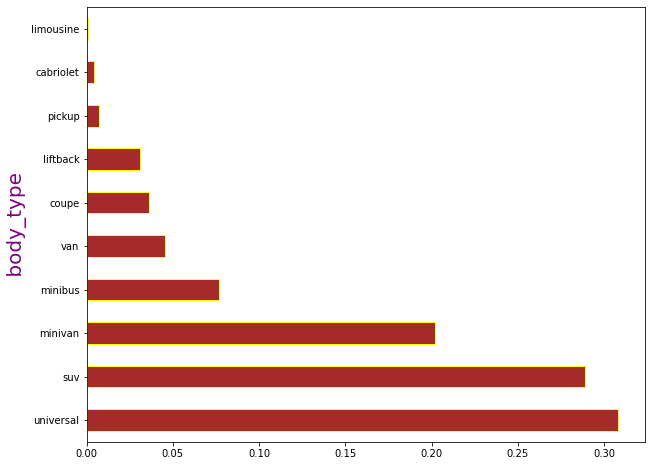

In [29]:
plt.figure(figsize=(10,8))
plt.ylabel(" body_type ",fontdict={"fontsize":20,"fontweight":5,"color":"purple"})
dfa[~((dfa.body_type=="sedan") | (dfa.body_type=="hatchback"))].body_type.value_counts(normalize=True).plot.barh(color="brown",edgecolor="yellow")
plt.show()

The above graph shows the information about different kinds of cars based on their body types except hatchback and sedan and comparision in their number.

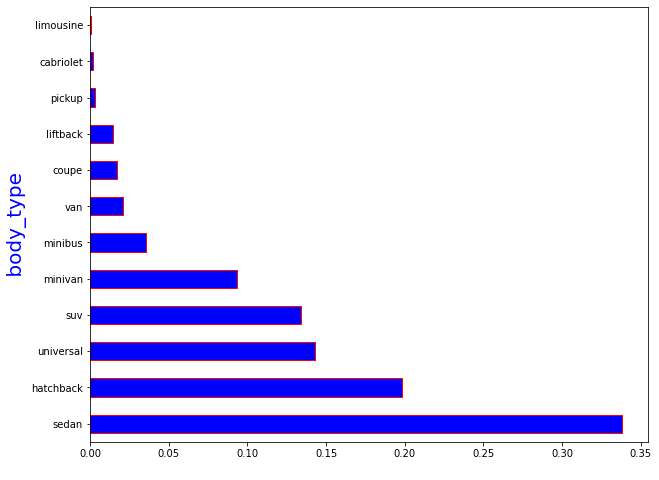

In [26]:
plt.figure(figsize=(10,8))
dfa.body_type.value_counts(normalize=True).plot.barh(color="blue",edgecolor="red")
plt.xlabel(" ",fontdict={"fontsize":10,"fontweight":5,"color":"blue"})
plt.ylabel(" body_type ",fontdict={"fontsize":20,"fontweight":5,"color":"blue"})
plt.show()


The above graph shows the information about different kinds of cars based on their body types and comparision in their number.

## Box Plot

<AxesSubplot:ylabel=' price_usd '>

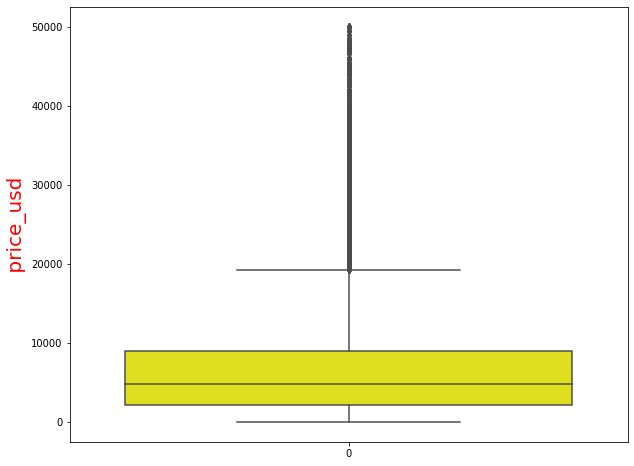

In [27]:
plt.figure(figsize=(10,8))
plt.ylabel(" price_usd ",fontdict={"fontsize":20,"fontweight":5,"color":"red"})
sns.boxplot(dfa["price_usd"],color="yellow")

The boxplot tells us that the median value price of used cars is 4,800.

Inter quartile range is between ( 2100 - 8950 ) usd


In [14]:
dfa["price_usd"].median()

4800.0

In [15]:
dfa.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38521.000000,38521.000000,38521.000000,38521.000000,38521.000000,38521.000000,38521.000000
mean,248910.074427,2002.940863,2.055161,6637.160884,9.648062,16.306586,80.584616
std,136059.499858,8.064761,0.671178,6425.198996,6.092860,43.291786,112.838577
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8950.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000



### Univariate ordered analysis

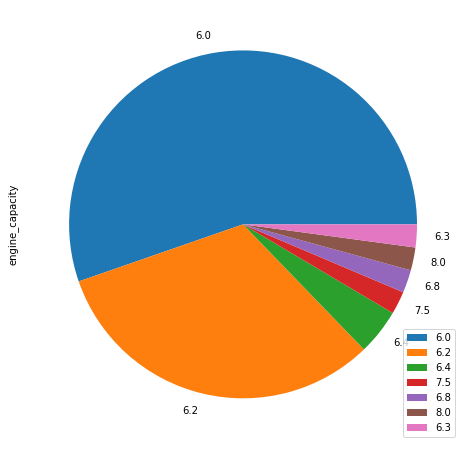

In [16]:
plt.figure(figsize=(10,8))
dfa[dfa.engine_capacity >= 6 ].engine_capacity.value_counts().plot.pie()
plt.legend()

From the above graph we can conclude that cars having engine_capacity 6.0 L are more in number int the range (6-8)

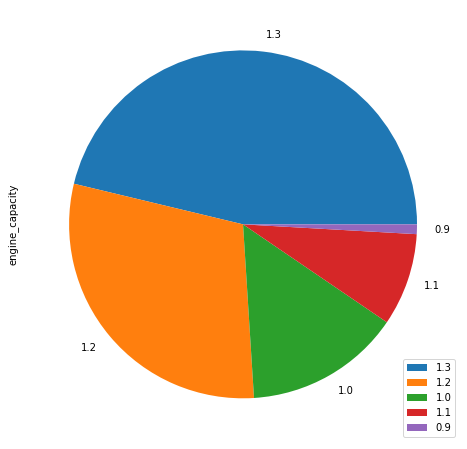

In [34]:
plt.figure(figsize=(10,8))
dfa[(dfa.engine_capacity < 1.4) & (dfa.engine_capacity > 0.8)].engine_capacity.value_counts().plot.pie()
plt.legend()

In engine capacity(0.9 - 1.3) most cars have 1.3 L capacity and very fewer cars have 0.9 L capacity.

## Bivariate Analysis

## Scatter plot

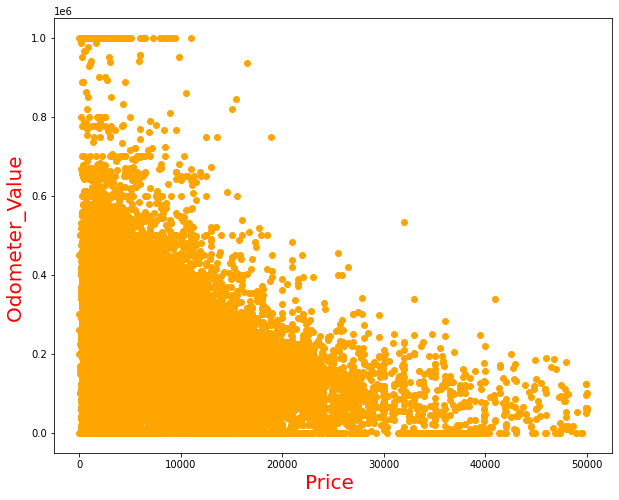

In [37]:
plt.figure(figsize=(10,8))
plt.scatter(dfa.price_usd,dfa.odometer_value,color="orange")
plt.xlabel("Price ",fontdict={"fontsize":20,"fontweight":5,"color":"red"})
plt.ylabel("Odometer_Value ",fontdict={"fontsize":20,"fontweight":5,"color":"red"})
plt.show()

From the above scatter plot it can be concluded that price of the car that covered more distances has less price and the car that covered lesser distances has more price.

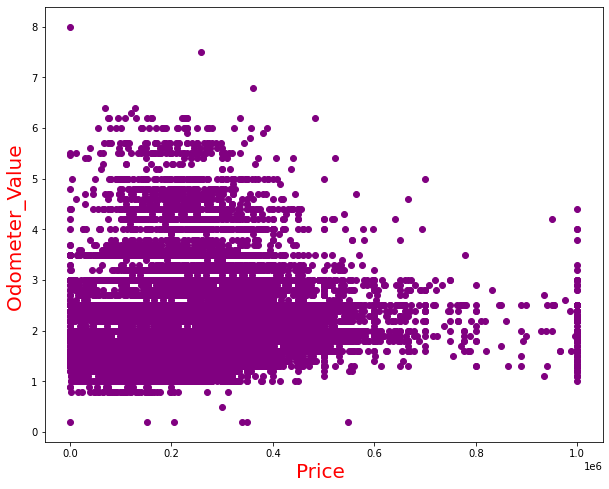

In [38]:
plt.figure(figsize=(10,8))
plt.scatter(dfa.odometer_value,dfa.engine_capacity,color="purple")
plt.xlabel("odometer_value ",fontdict={"fontsize":20,"fontweight":5,"color":"red"})
plt.ylabel("engine_capacity ",fontdict={"fontsize":20,"fontweight":5,"color":"red"})
plt.show()

From the above scatter plot we can depict that cars having lesser odometer reading(100000-400000) has less engine capacity that is 1L to 3L.
There are many anamolies in the above plot.
From the above plot we can't exacty conclude the relationship between the two variables.

In [20]:
dfa[["odometer_value","price_usd","engine_capacity"]].corr()

,odometer_value,price_usd,engine_capacity
odometer_value,1.000000,-0.420965,0.105704
price_usd,-0.420965,1.000000,0.296597
engine_capacity,0.105704,0.296597,1.000000


## Correlation Heatmap

<AxesSubplot:>

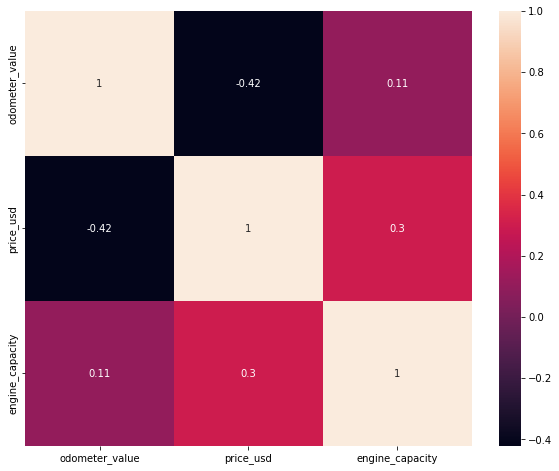

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(dfa[["odometer_value","price_usd","engine_capacity"]].corr(),annot=True)


-A positive correlation is a relationship between two variables that tend to move in the same direction. A positive correlation   exists when one variable tends to decrease as the other variable decreases, or one variable tends to increase when the other   increases.

  Here (odometer_value,engine_capacity),(price_usd,engine_capacity) has positive correlation.

-A negative correlation is a relationship between two variables such that as the value of one variable increases, the other       decreases.
  
  Here (price_usd,odometer_value) has negative correlation.

### Grouping based on body_type and finding relation between body_type and price_usd

In [22]:
dfa.groupby("body_type")["price_usd"].mean()

body_type
cabriolet    10975.530667
coupe         7457.789586
hatchback     4024.624978
liftback      7791.859127
limousine     8154.083333
minibus       8462.483776
minivan       6130.798789
pickup       11748.207829
sedan         5804.166197
suv          13772.248914
universal     5014.982555
van           6674.545941
Name: price_usd, dtype: float64

In [24]:
dfa.groupby("body_type")["price_usd"].median()

body_type
cabriolet     7250.0
coupe         4675.0
hatchback     3000.0
liftback      7000.0
limousine     7400.0
minibus       6700.0
minivan       5000.0
pickup        9999.0
sedan         4000.0
suv          11750.0
universal     3900.0
van           4900.0
Name: price_usd, dtype: float64

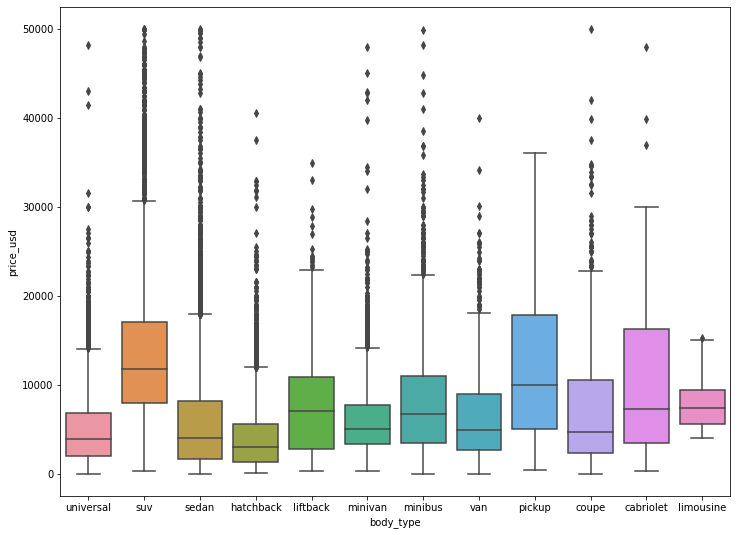

In [55]:
plt.figure(figsize=(12,9))
sns.boxplot(data=dfa,x="body_type",y="price_usd")
plt.show()

The above box plot shows the relationship between the price in usd of car and different tyes of bodies of the cars.
With this graph we can find median, interquartile range and even outliers of different body types of cars with respective to price_usd.

In [56]:
dfa.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38521.000000,38521.000000,38521.000000,38521.000000,38521.000000,38521.000000,38521.000000
mean,248910.074427,2002.940863,2.055161,6637.160884,9.648062,16.306586,80.584616
std,136059.499858,8.064761,0.671178,6425.198996,6.092860,43.291786,112.838577
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8950.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


In [57]:
df.nlargest(5, ['price_usd'])[["manufacturer_name","price_usd"]]

,manufacturer_name,price_usd
7691,Jaguar,50000.0
29297,BMW,50000.0
34421,Mercedes-Benz,49999.0
31558,Land Rover,49950.0
35399,Mercedes-Benz,49950.0


In [59]:
df.nsmallest(1, ['price_usd'])[["manufacturer_name","price_usd"]]

,manufacturer_name,price_usd
8230,ВАЗ,1.0


In [39]:
dfa[["drivetrain"]].nunique()

drivetrain    3
dtype: int64

### Checking if there are any null values in the data.

In [40]:
dfa.isna().sum().sum()

0

<AxesSubplot:xlabel='engine_fuel', ylabel='odometer_value'>

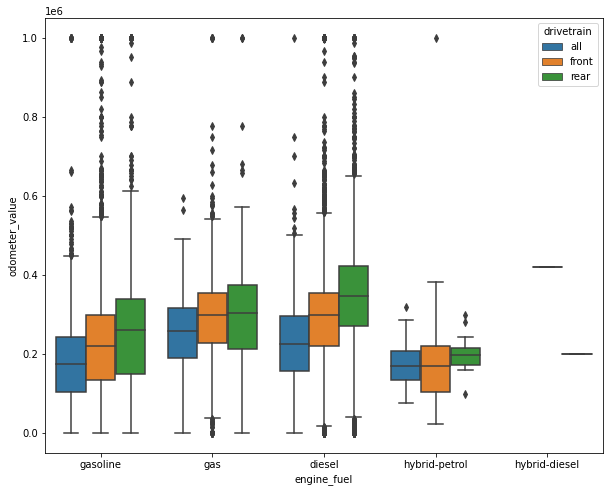

In [41]:
plt.figure(figsize=(10,8))
sns.boxplot(data=dfa,x="engine_fuel" ,y="odometer_value",hue="drivetrain")

<AxesSubplot:xlabel='price_usd', ylabel='odometer_value'>

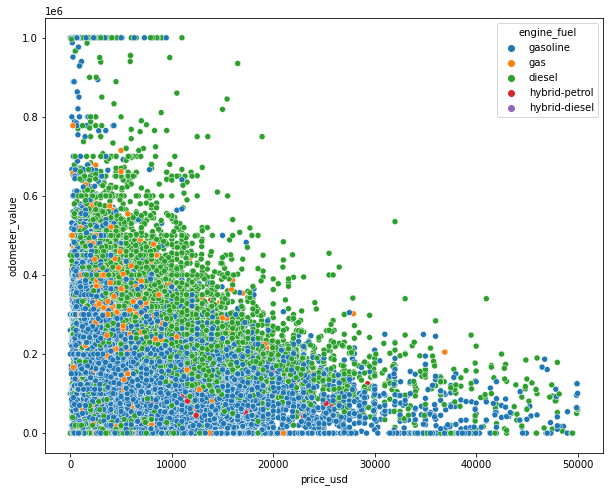

In [42]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=dfa,x="price_usd",y="odometer_value",hue="engine_fuel")

In [43]:
a=pd.pivot_table(data=dfa,index="drivetrain",columns="engine_fuel",values="price_usd")
a=a.drop(["hybrid-diesel"],axis=1)


In [44]:
a

engine_fuel,diesel,gas,gasoline,hybrid-petrol
drivetrain,,,,
all,15298.896285,8418.861189,13074.518866,17891.304348
front,5827.103558,3713.170361,5182.027329,10413.627828
rear,7083.786344,3445.232181,5511.494440,12027.785714


<AxesSubplot:xlabel='engine_fuel', ylabel='drivetrain'>

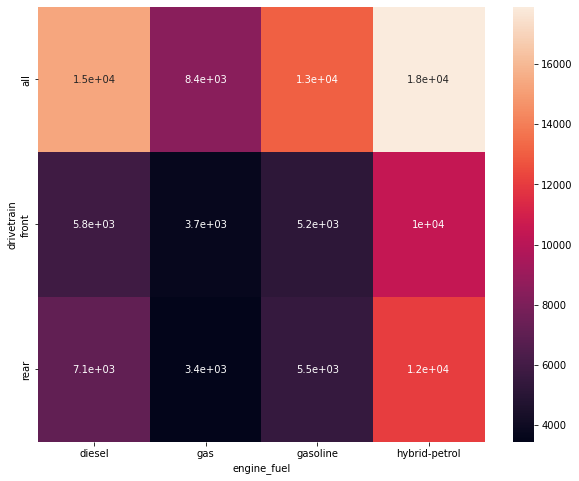

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(a,annot=True)

In [54]:
d=pd.pivot_table(data=dfa,index="smart_screen",columns="engine_fuel",values="odometer_value")

In [55]:
d

engine_fuel,diesel,gas,gasoline,hybrid-diesel,hybrid-petrol
smart_screen,,,,,
False,324349.652709,305234.192719,245762.363913,310000.0,220694.107143
True,261927.347407,256125.828087,186268.493646,NaN,159190.944134


In [56]:
b=pd.pivot_table(data=dfa,index="air_conditioner",columns="engine_fuel",values="odometer_value")

<AxesSubplot:xlabel='engine_fuel', ylabel='air_conditioner'>

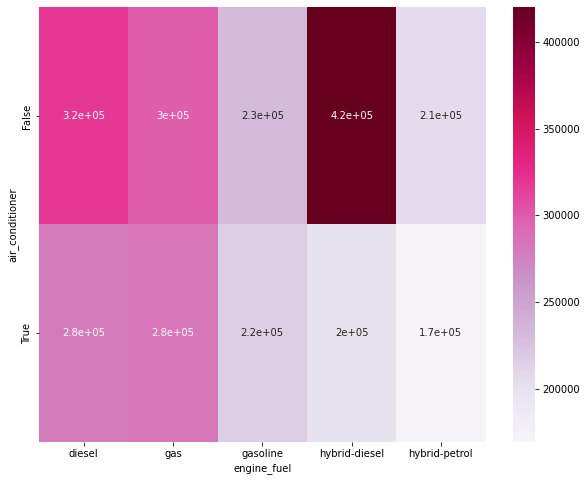

In [57]:
plt.figure(figsize=(10,8))
sns.heatmap(b,annot=True,cmap="PuRd")

<AxesSubplot:xlabel='engine_fuel', ylabel='smart_screen'>

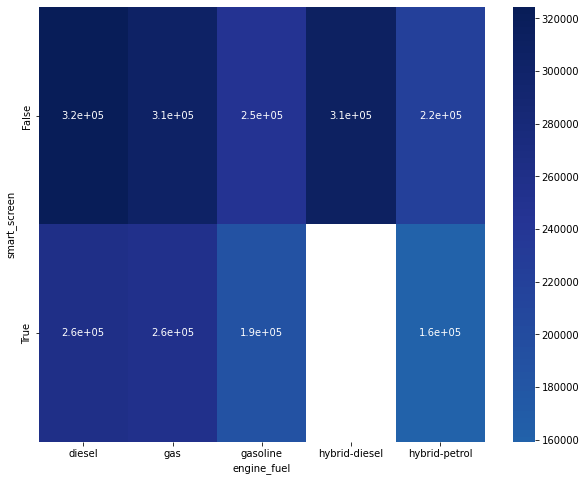

In [58]:
plt.figure(figsize=(10,8))
sns.heatmap(d,annot=True,cmap="YlGnBu",center=7000)

<Figure size 864x720 with 0 Axes>

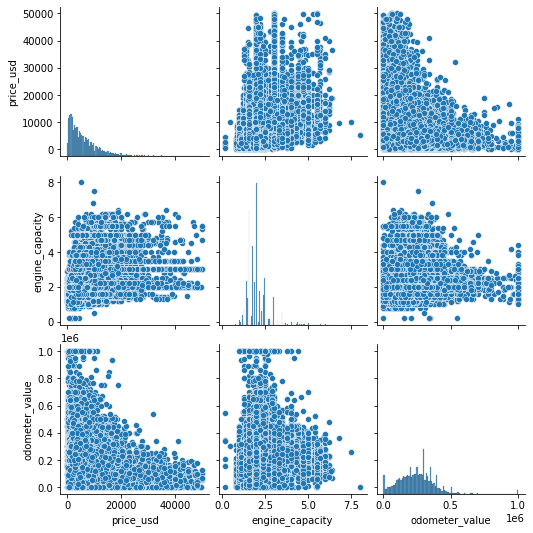

In [50]:
plt.figure(figsize=(12,10))
sns.pairplot(data=dfa[["price_usd","engine_capacity","odometer_value"]])

In [51]:
c=pd.pivot_table(data=dfa,index="turbo_engine",columns="disk_brakes",values="price_usd")
c

disk_brakes,False,True
turbo_engine,,
False,4145.410086,7133.353281
True,7909.370756,12808.469362


<AxesSubplot:xlabel='disk_brakes', ylabel='turbo_engine'>

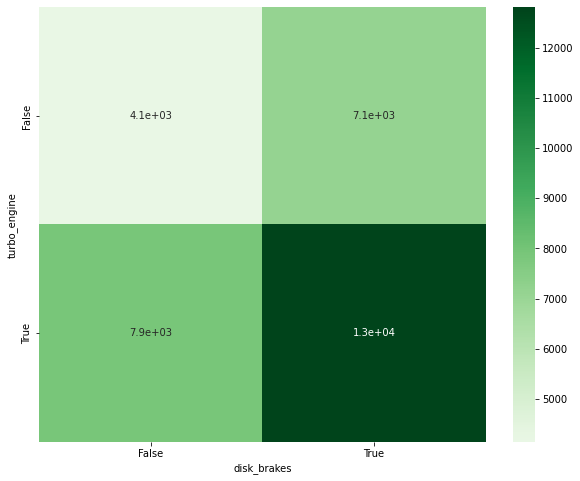

In [52]:
plt.figure(figsize=(10,8))
sns.heatmap(c,annot=True,cmap="Greens",center=8000)